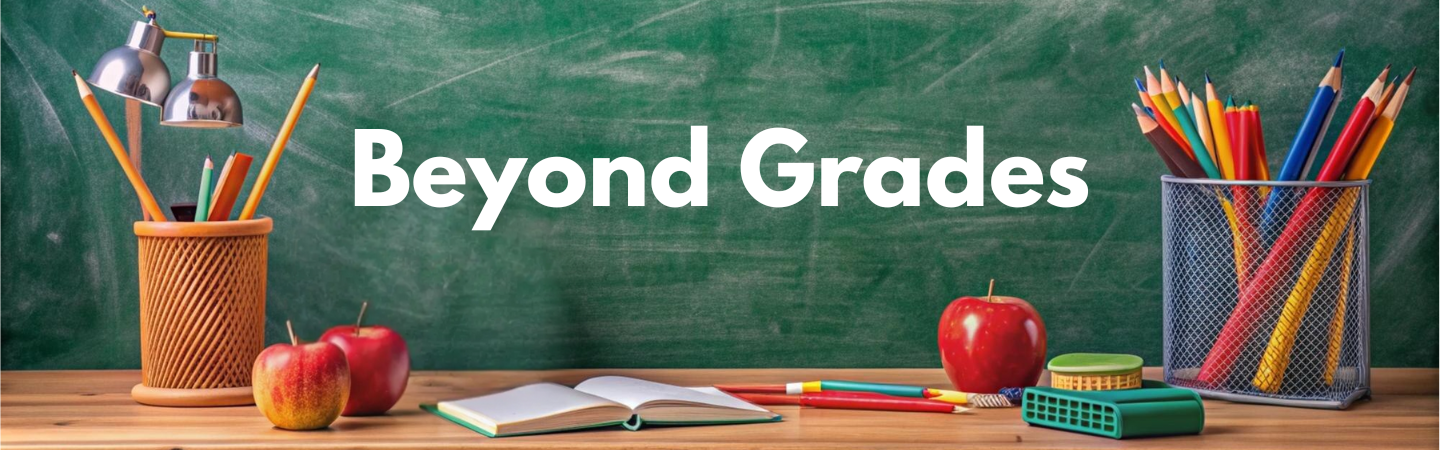

# Table of Contents

1. [Introduction](#Introduction)
2. [Installing Required Libraries](#Installing-Required-Libraries)
3. [Load and Explore the Dataset](#Load-and-Explore-the-Dataset)
4. [Data Visualization](#Data-Visualization)
5. [Data Preprocessing](#Data-Preprocessing)
6. [Modeling](#Modeling)
7. [Conclusion](#Conclusion)

# Beyond Grades: Uncovering the Hidden Factors Behind Students Grades Using Machine Learning

## Introduction

Academic performance is often seen as the result of intelligence and effort alone, but in reality, it is influenced by a complex interplay of social, economic, psychological, and behavioral factors. This project aims to go **beyond grades** by exploring and modeling the hidden factors that shape students' academic success using machine learning techniques.

Using the **Student Performance Dataset** from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/320/student+performance), we will:
- Predict students' final grades (G3) based on various attributes such as demographic data, family background, school support, and lifestyle.
- Identify the most influential features contributing to students' academic outcomes.
- Provide interpretable insights that can be used by educators, policymakers, and stakeholders to better support students.

This notebook walks through the full machine learning pipeline:
- Data understanding and cleaning
- Exploratory data analysis (EDA)
- Feature engineering and model building
- Evaluation and interpretation
- Insights and conclusions

By the end of this project, we aim to reveal which hidden factors have the greatest impact on student success, helping shift the focus from raw grades to the broader context of each learner’s journey.


# Installing Required Libraries

In [47]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

%matplotlib inline

!pip install ucimlrepo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


import warnings
warnings.filterwarnings("ignore")

# Load and Explore the Dataset

## About the Dataset

This project uses the **Student Performance Dataset** from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/320/student+performance). It contains data collected from two Portuguese secondary schools regarding student achievement in **Mathematics** (`student-mat.csv`) and **Portuguese language** (`student-por.csv`).

### Dataset Details

- **Total Instances**: 395 students (in each CSV)
- **Total Attributes**: 33 features + 3 grades (G1, G2, G3)

### Feature Categories

- **Demographic**: `sex`, `age`, `address`, `famsize`, `Pstatus`
- **Parental Info**: `Medu`, `Fedu`, `Mjob`, `Fjob`, `guardian`
- **School-related**: `school`, `school support`, `paid classes`, `absences`
- **Study and Social Life**: `studytime`, `failures`, `internet`, `goout`, `health`
- **Performance**: `G1`, `G2`, and `G3` (first, second, and final grades)

### 🎯 Target Variable

- `G3`: Final year grade (integer from 0 to 20)

This dataset is well-suited for regression analysis and exploratory modeling to understand the impact of non-academic factors on student success.


In [13]:
from ucimlrepo import fetch_ucirepo  

# Fetch dataset
student_performance = fetch_ucirepo(id=320)

# Combine features and target into one DataFrame
df = pd.concat([student_performance.data.features, student_performance.data.targets], axis=1)

# metadata 
print(student_performance.metadata) 
  
# variable information 
print(student_performance.variables) 


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

In [14]:
# Show the first few rows
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Data Shape: (649, 33)

Column Names:
 ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Data Types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences   

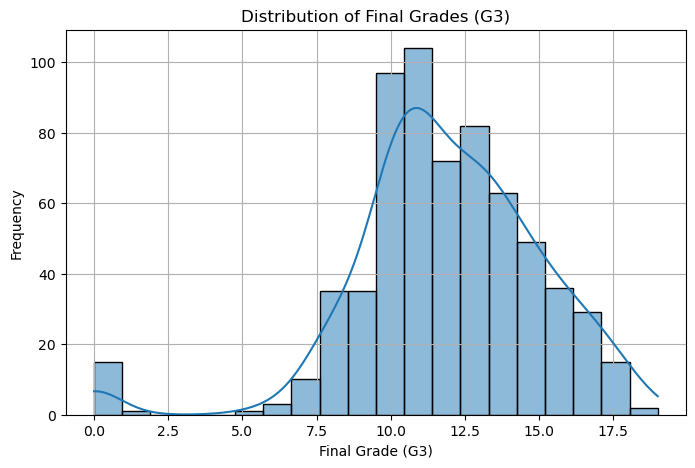

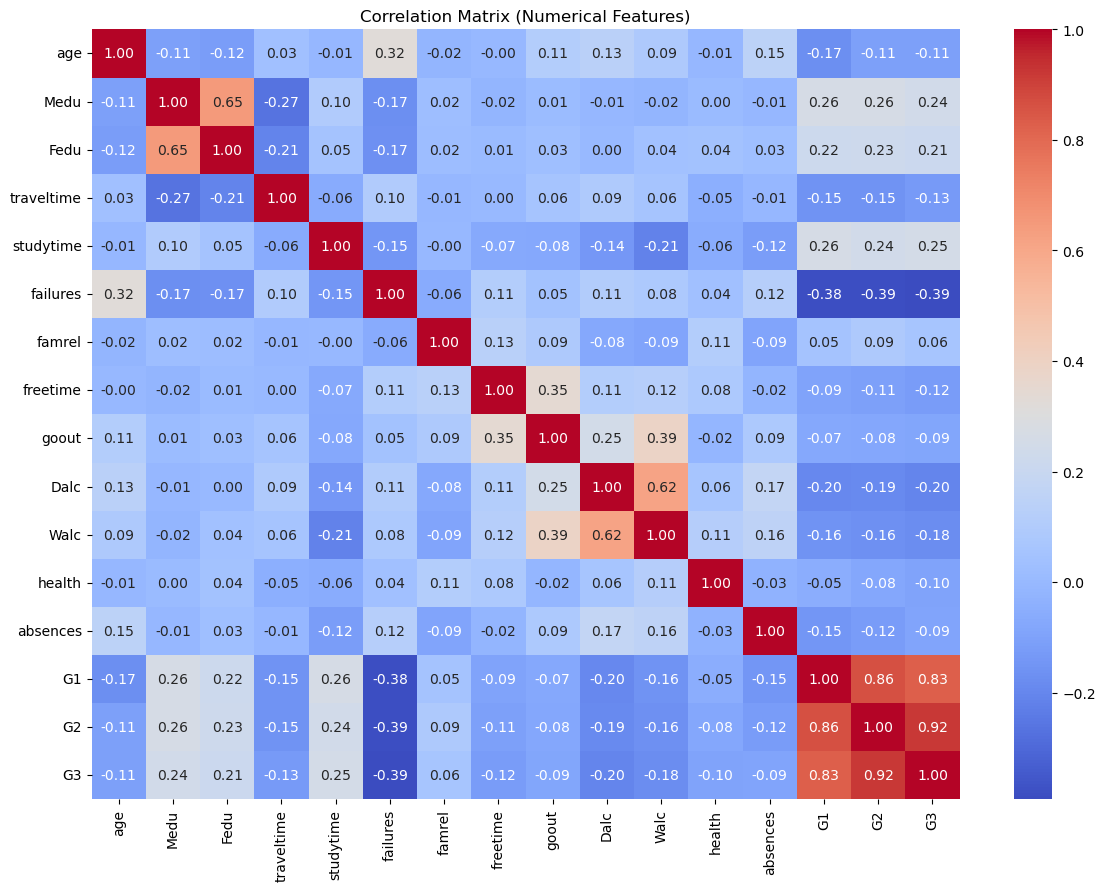

In [15]:
# -------------------------------
# 🔹 Basic Data Info
# -------------------------------

print("Data Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDescriptive Statistics:\n", df.describe())

# -------------------------------
# 🔹 Distribution of Target Variable
# -------------------------------

plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], bins=20, kde=True)
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# -------------------------------
# 🔹 Correlation Heatmap
# -------------------------------

plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


# Data Visualization


This section visually explores the dataset to identify patterns, trends, and relationships between features and student performance (final grade `G3`). Effective data visualization can uncover hidden insights that are not easily visible in raw statistics.

### 🎓 Grade Distribution
Histograms are used to observe the distribution of students' grades across three periods (`G1`, `G2`, `G3`). These plots help assess overall performance and detect skewness or concentration.

### 🔁 Correlation Heatmap
A correlation heatmap is generated from the encoded dataset to show relationships between all features. This helps identify which variables have strong linear associations with the target (`G3`).

### 📊 Categorical Features vs G3 (Boxplots)
Boxplots illustrate how categorical variables such as `sex`, `school`, `internet`, and `romantic relationship status` influence the final grade. These visualizations make it easier to compare the central tendencies and spread of `G3` across different groups.

### 📉 Numeric Relationships (Scatter Plots)
Scatter plots with regression lines are used to investigate how continuous or ordinal features (like `G1`, `G2`, `failures`, `studytime`, and `absences`) correlate with `G3`. This provides a clearer view of linear or non-linear trends.

### 📈 Average Final Grade by Selected Features (Bar Charts)
Bar charts display the average final grade (`G3`) across various groupings such as study time, number of past failures, health status, social life (`goout`), and absences. These insights can suggest which behavioral or social factors most impact academic performance.

These visualizations are foundational in guiding feature selection and forming hypotheses for model building.


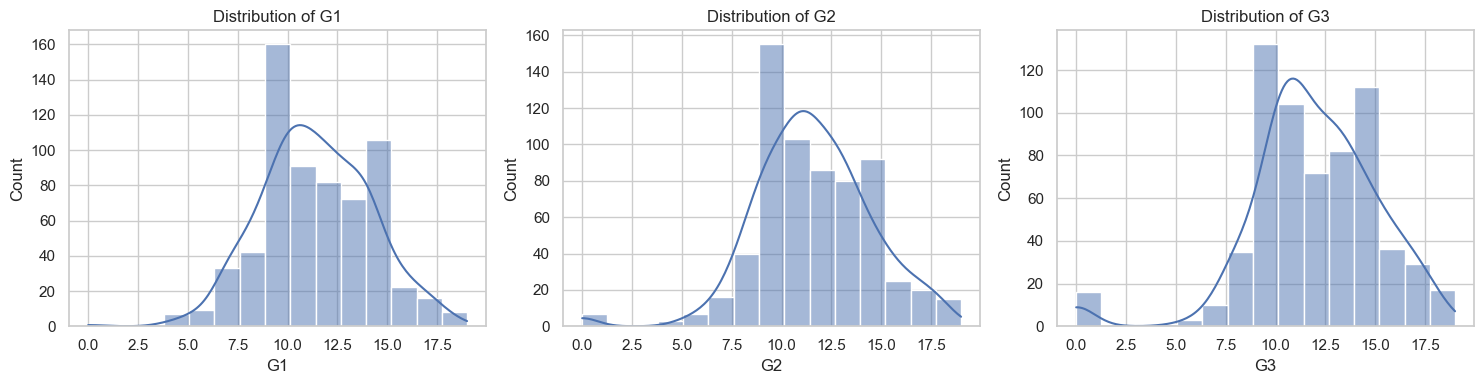

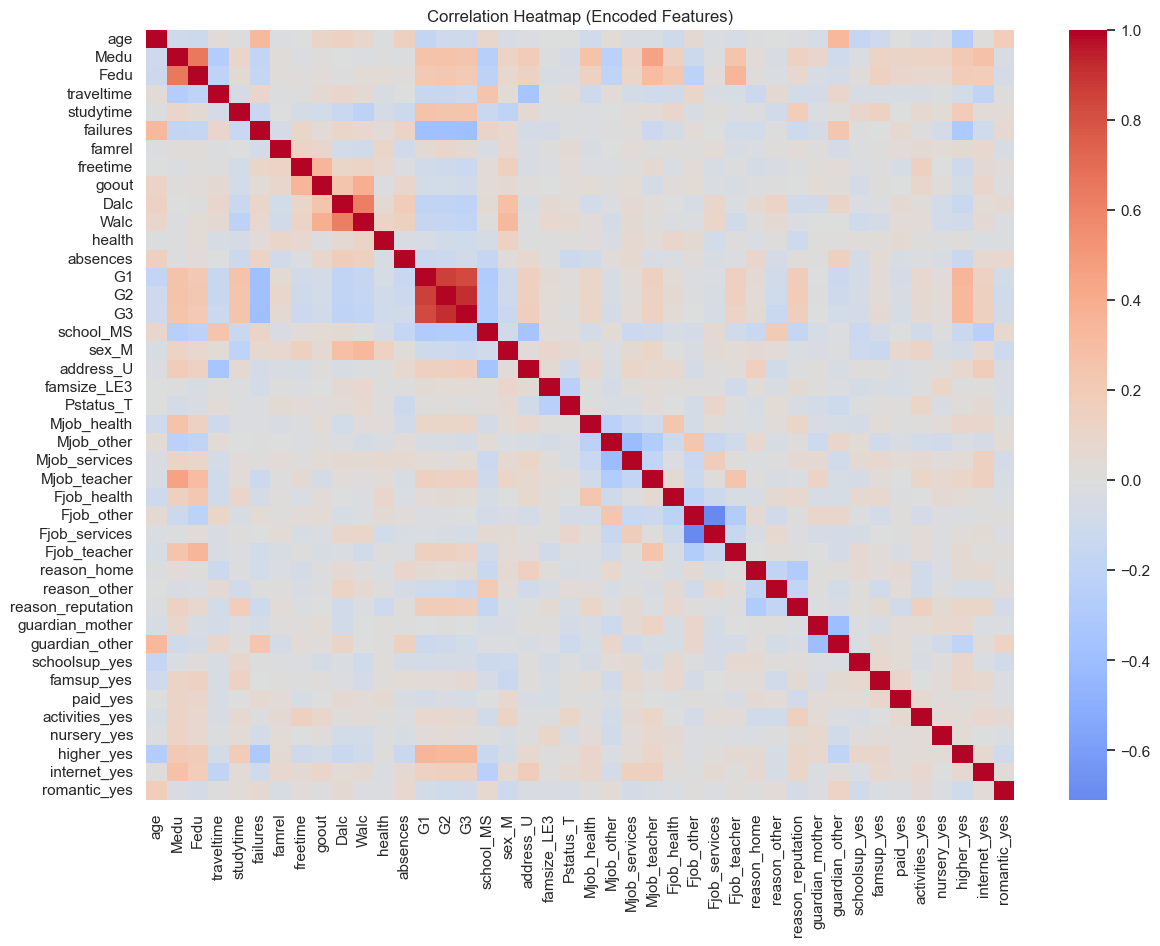

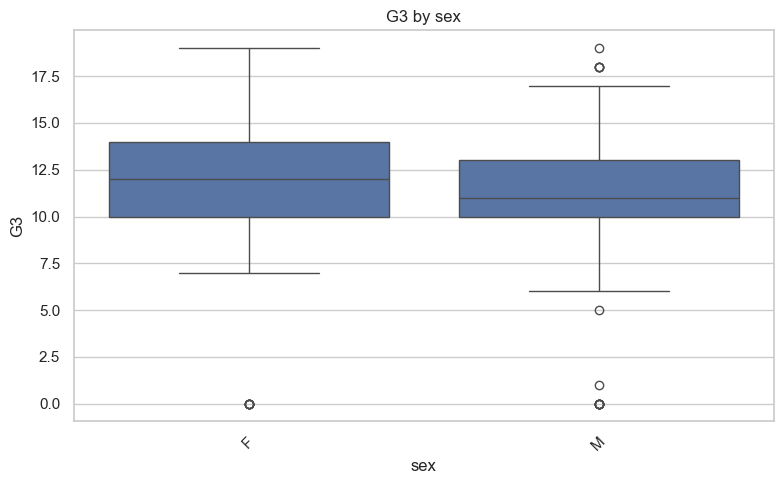

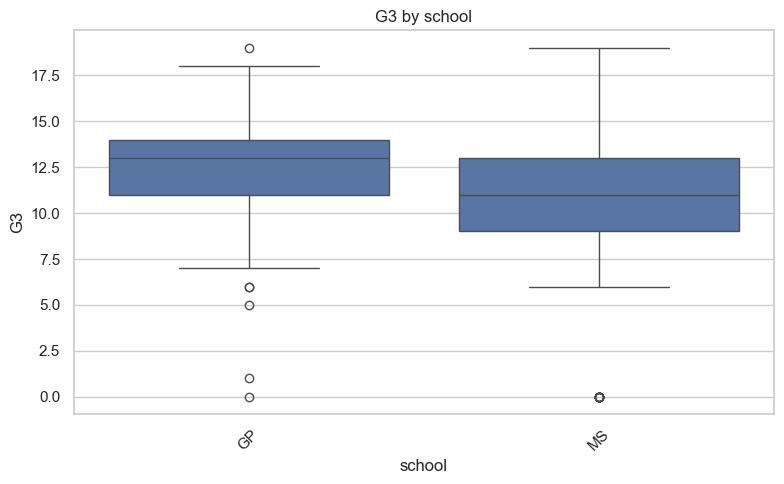

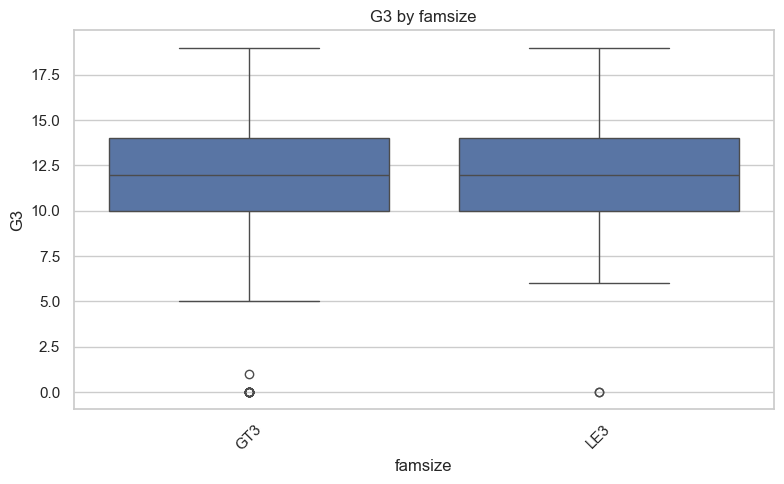

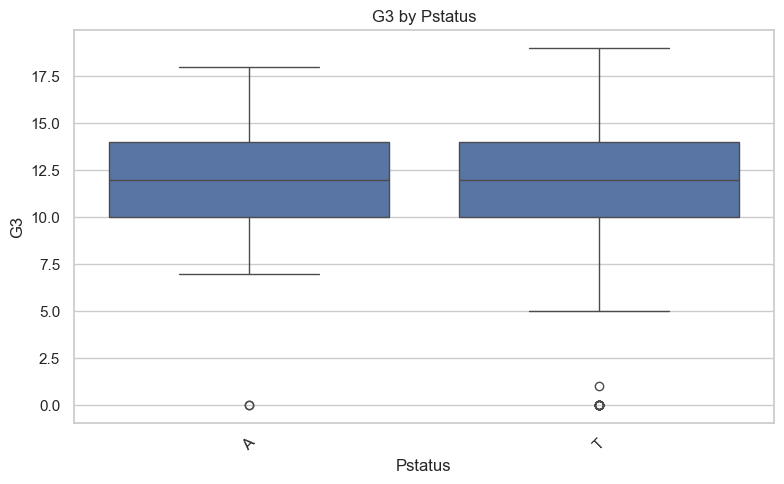

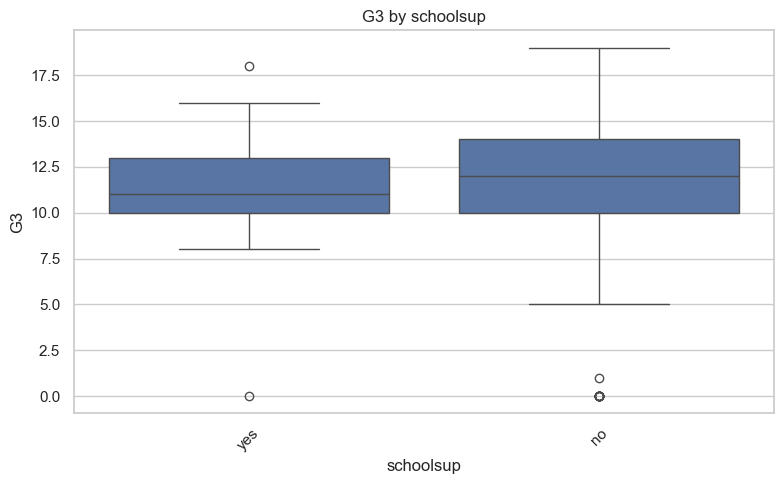

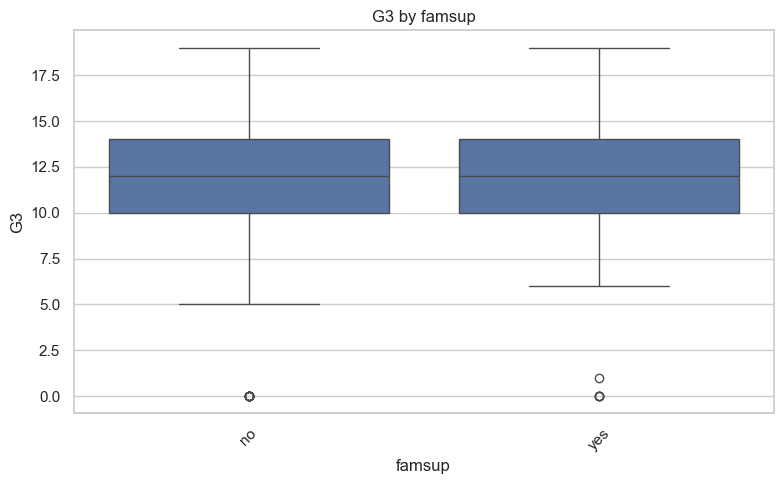

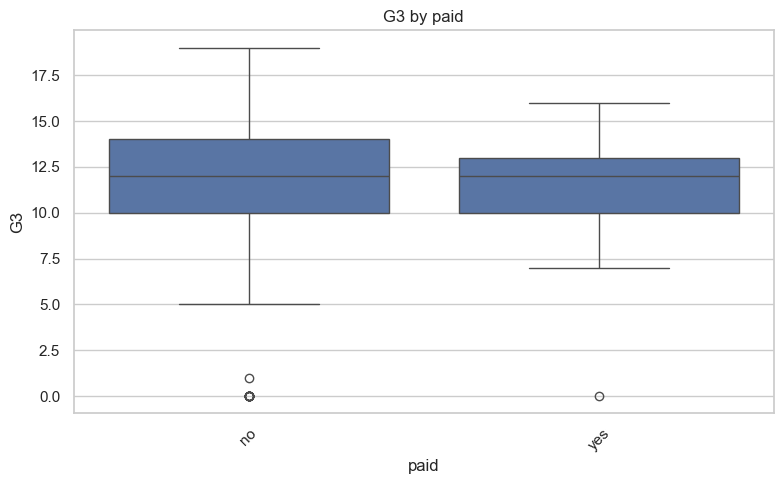

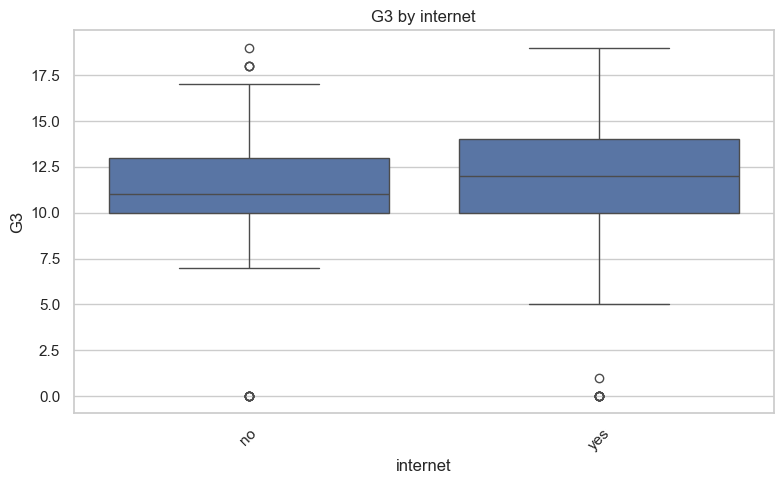

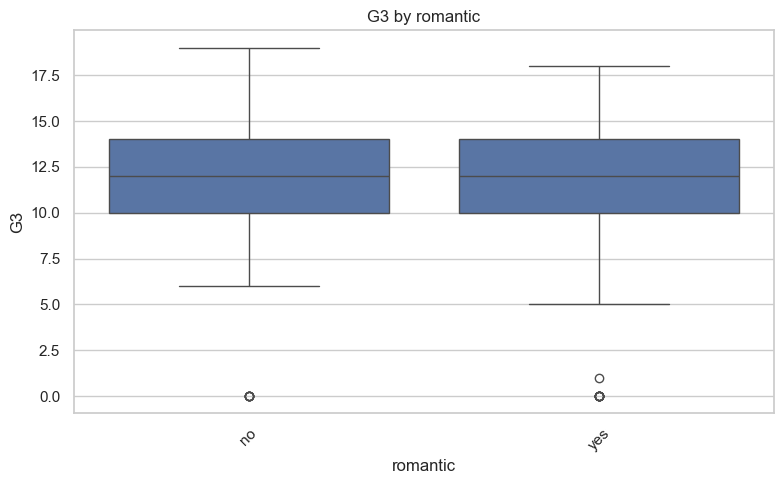

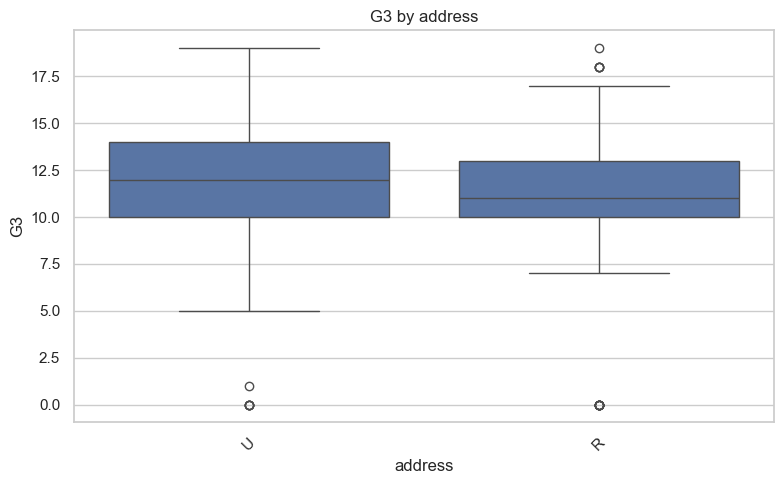

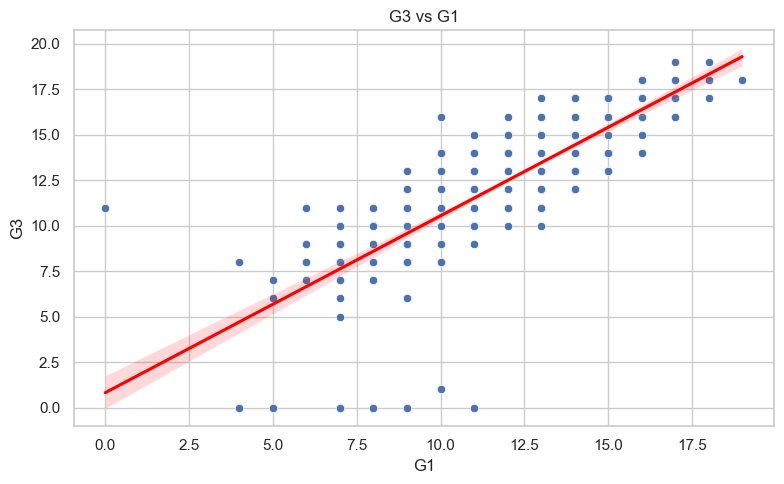

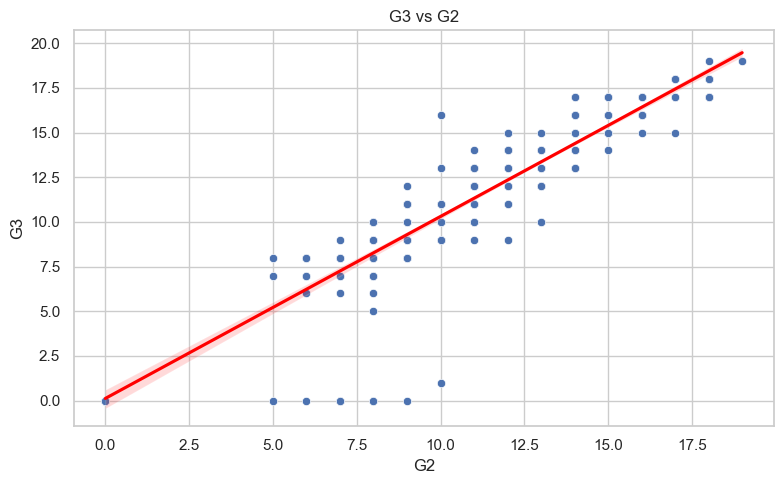

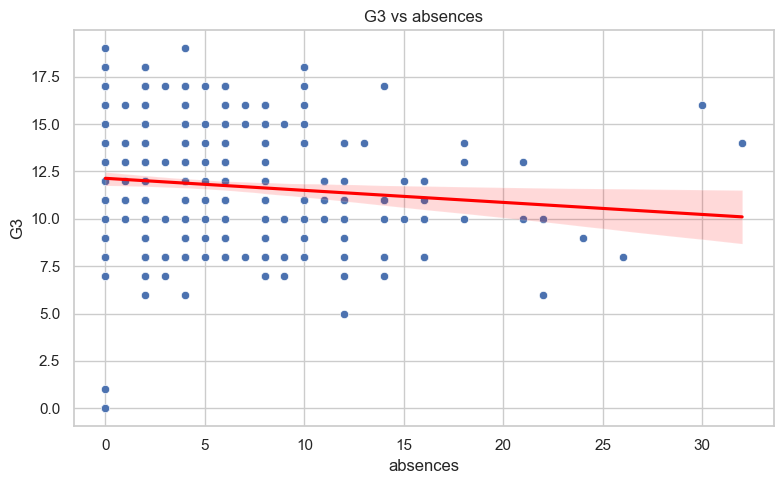

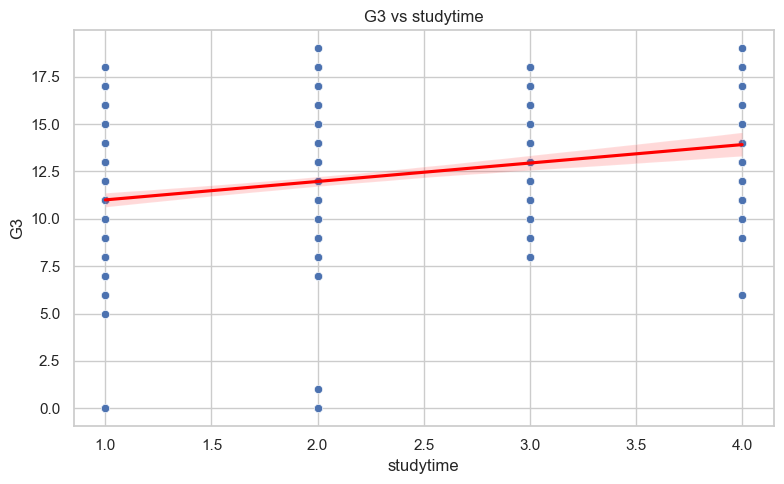

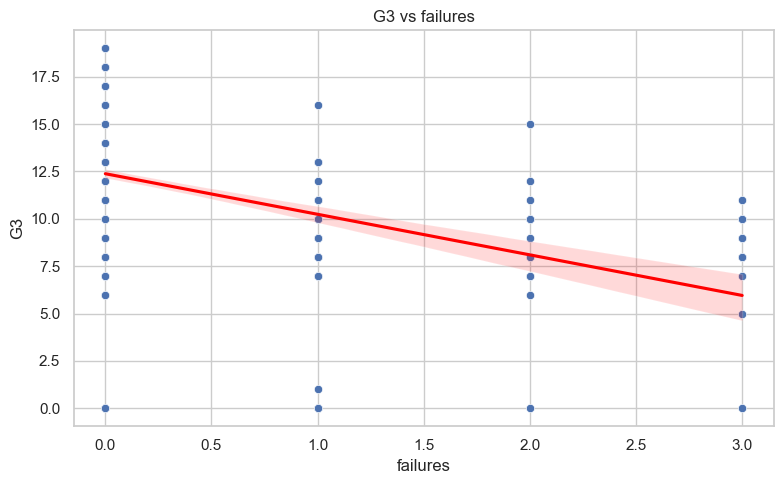

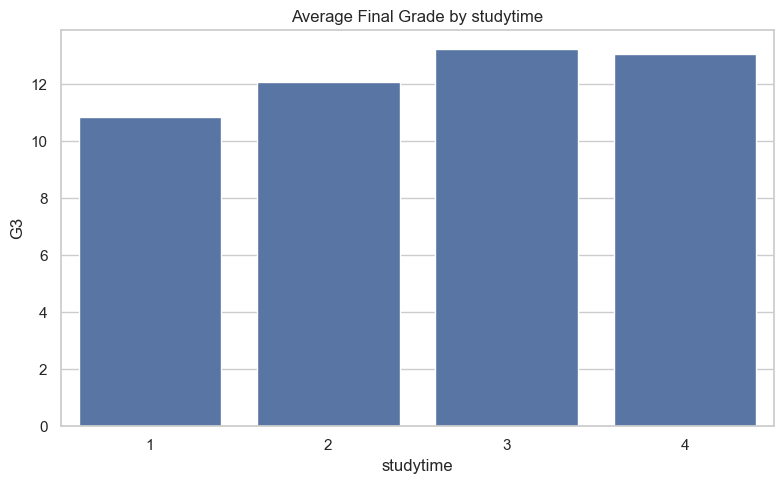

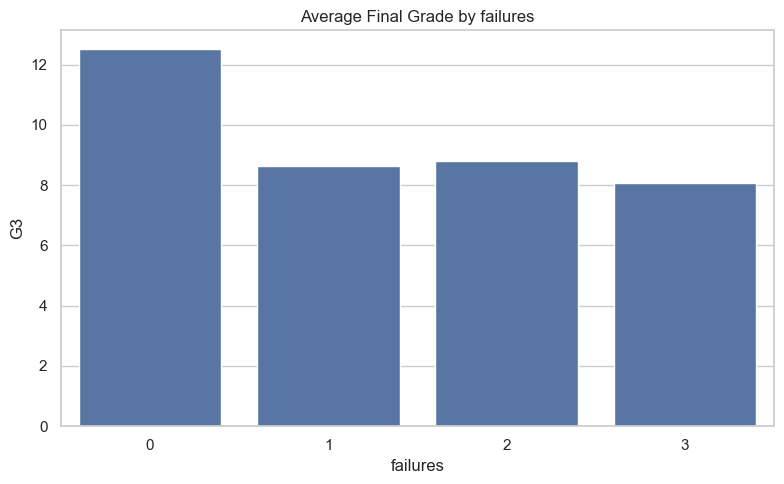

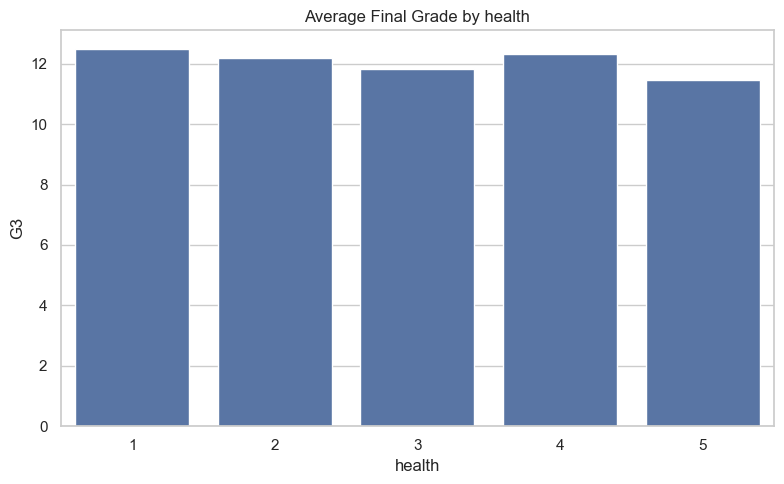

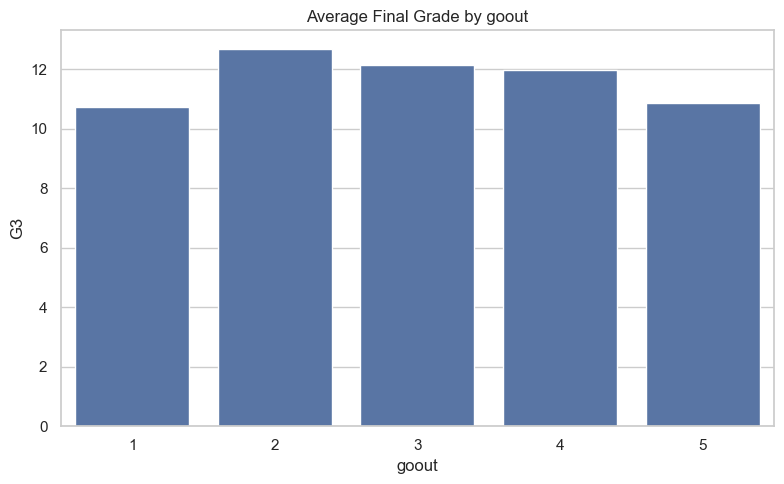

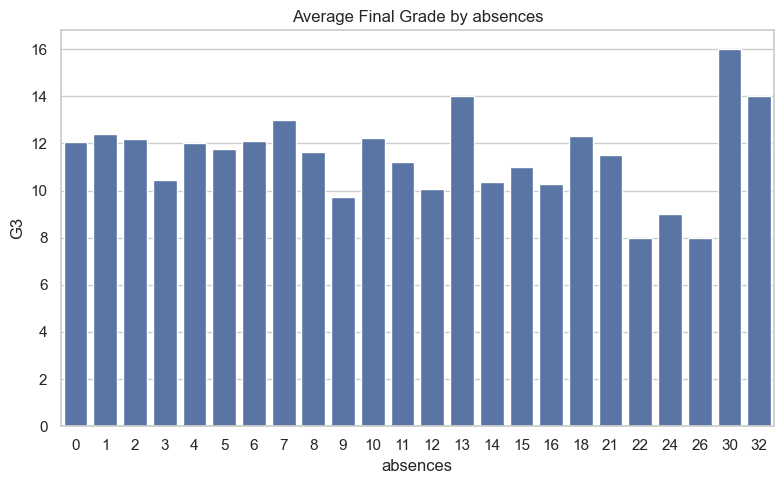

In [24]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# -------------------------------
# 🎓 1. Distribution of Grades
# -------------------------------

grade_cols = ['G1', 'G2', 'G3']

plt.figure(figsize=(15, 4))
for i, col in enumerate(grade_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=15)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# -------------------------------
# 🔁 2. Correlation Heatmap (All Features Encoded)
# -------------------------------

import pandas as pd
df_encoded = pd.get_dummies(df, drop_first=True)

plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Heatmap (Encoded Features)")
plt.show()

# -------------------------------
# 📊 3. Boxplots: Categorical Features vs G3
# -------------------------------

box_features = ['sex', 'school', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 
                'paid', 'internet', 'romantic', 'address']

for col in box_features:
    plt.figure()
    sns.boxplot(x=col, y='G3', data=df)
    plt.title(f"G3 by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# -------------------------------
# 📉 4. Scatter Plots for Numeric Relationships
# -------------------------------

scatter_pairs = [('G1', 'G3'), ('G2', 'G3'), ('absences', 'G3'), 
                 ('studytime', 'G3'), ('failures', 'G3')]

for x, y in scatter_pairs:
    plt.figure()
    sns.scatterplot(x=df[x], y=df[y])
    sns.regplot(x=df[x], y=df[y], scatter=False, color='red')
    plt.title(f"{y} vs {x}")
    plt.tight_layout()
    plt.show()

# -------------------------------
# 📈 5. Average G3 by Selected Features (Bar Plots)
# -------------------------------

bar_features = ['studytime', 'failures', 'health', 'goout', 'absences']

for col in bar_features:
    means = df.groupby(col)['G3'].mean().reset_index()
    plt.figure()
    sns.barplot(x=col, y='G3', data=means)
    plt.title(f"Average Final Grade by {col}")
    plt.tight_layout()
    plt.show()


# Data Preprocessing

Before building machine learning models, we must clean and prepare the data for analysis. This step ensures that the dataset is structured, numerical, and scaled appropriately.

### 1. Encoding Categorical Variables
Since many features are categorical (e.g., `school`, `sex`, `internet`), we use **One-Hot Encoding** to convert them into numerical form. This allows ML models to process them effectively.

### 2. Feature & Target Separation
We separate the **input features (X)** from the **target variable (y)**, which is the final grade (`G3`).

### 3. Train-Test Split
The data is split into training and testing sets (80% train, 20% test). This ensures that we evaluate our models on unseen data.

### 4. Feature Scaling
We apply **Standard Scaling** to normalize the feature values, giving them zero mean and unit variance. This is particularly important for models sensitive to feature magnitude, such as Support Vector Machines and K-Nearest Neighbors.

The resulting dataset is now ready for model building.


In [33]:

# 1. Drop irrelevant or identifier columns
irrelevant_columns = ['guardian', 'address', 'Dalc', 'Walc']
df_cleaned = df.drop(columns=irrelevant_columns)

# 2. Encode categorical variables using One-Hot Encoding
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# 3. Separate features and target
X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']

# 4. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Modeling

In this section, we build and compare multiple regression models to predict students' final grades (`G3`) based on various academic, demographic, and behavioral features.

### Models Used:
- **Linear Regression**: A baseline model assuming a linear relationship between features and the target.
- **Random Forest Regressor**: An ensemble model that builds multiple decision trees and averages their predictions, often yielding strong performance.
- **Support Vector Regressor (SVR)**: A robust model that finds a hyperplane to best fit the data within a margin, suitable for both linear and non-linear relationships.

### Evaluation Metrics:
- **MSE (Mean Squared Error)**: Measures average squared differences between actual and predicted values.
- **RMSE (Root Mean Squared Error)**: Square root of MSE; interpretable in the same unit as the target.
- **R² Score (Coefficient of Determination)**: Indicates how well the model explains the variance in the target (1 = perfect, 0 = no explanation).

We compare the performance of all models to identify the best fit for our data.


In [49]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Train, predict, and evaluate each model
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MSE": round(mse, 2),
        "RMSE": round(rmse, 2),
        "R² Score": round(r2, 3)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by="R² Score", ascending=False)


,Model,MSE,RMSE,R² Score
0,Linear Regression,1.47,1.21,0.849
1,Random Forest,1.64,1.28,0.832
2,Support Vector Regressor,3.10,1.76,0.682


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create base model
rf = RandomForestRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=1
)

# Fit on training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score (CV):", grid_search.best_score_)

# Evaluate on test data
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R² Score: {r2:.3f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R² Score (CV): 0.7936853912570291
Test MSE: 1.96
Test RMSE: 1.40
Test R² Score: 0.799


# Model Performance Comparison: Tuned vs. Initial Random Forest

After tuning the **Random Forest** model using `GridSearchCV`, the performance on the test set decreased slightly compared to the initial model. This could be due to several factors:

1. **Overfitting**: The hyperparameters chosen based on cross-validation might have caused the model to overfit to the training data, leading to poor generalization on the test set.
2. **Hyperparameter Choice**: While the tuned parameters yielded a better cross-validation score, they might not be optimal for the test set.
3. **Increased Model Complexity**: The increase in `n_estimators` and deeper trees (`max_depth=None`) could have led to a model that’s too complex for this dataset, resulting in higher variance and a decrease in performance.

In practice, **hyperparameter tuning** can sometimes improve results, but it may also lead to reduced performance if not properly balanced. It’s essential to evaluate models both on training and test data to ensure generalization.


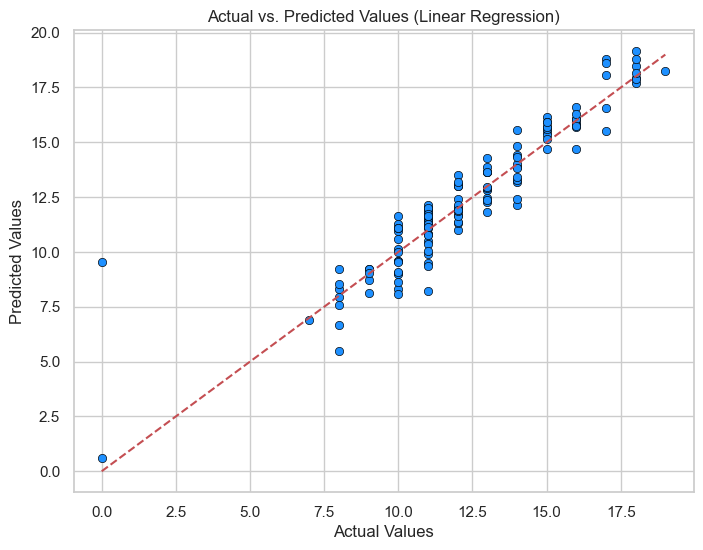

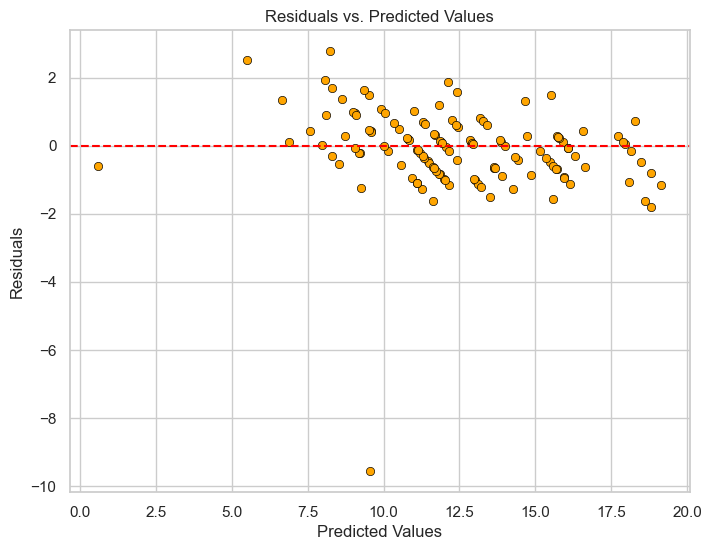

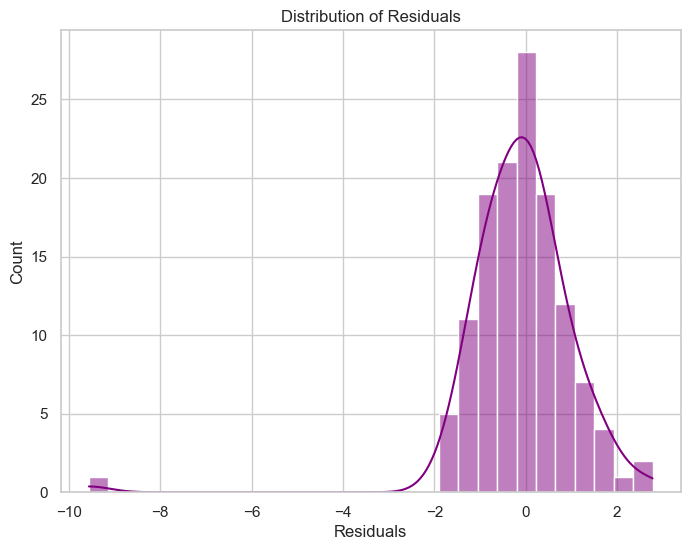

In [57]:
# Predict on test data

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

y_pred = linear_model.predict(X_test_scaled)

# 1. Actual vs. Predicted Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='dodgerblue', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.grid(True)
plt.show()

# 2. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='orange', edgecolor='black')
plt.axhline(0, linestyle='--', color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.grid(True)
plt.show()

# 3. Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.grid(True)
plt.show()

# Conclusion

In this project, we explored the *Student Performance* dataset to uncover hidden factors influencing students' academic outcomes using machine learning.

Key insights and results include:

- **Exploratory Data Analysis (EDA)** revealed that features such as **study time**, **failures**, **parental education**, and **school support** have a strong correlation with students' final grades.
- Multiple regression models were trained and evaluated. **Linear Regression** initially performed the best with an **R² score of 0.85**, indicating a strong fit.
- However, after hyperparameter tuning, models like **Random Forest** showed competitive performance, although not significantly better than the baseline Linear Regression.
- Visualization of residuals confirmed that the Linear Regression model captured the data trends fairly well with minimal bias.

These results show that a simple linear model can effectively capture the main factors behind student performance, making it both interpretable and useful for educational insights.

This project demonstrates how data-driven approaches can assist educators and policymakers in identifying students at risk and making informed interventions.
